<a href="https://colab.research.google.com/github/gumparlapatinavyasri/CodeAlpha_sentimentanalysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

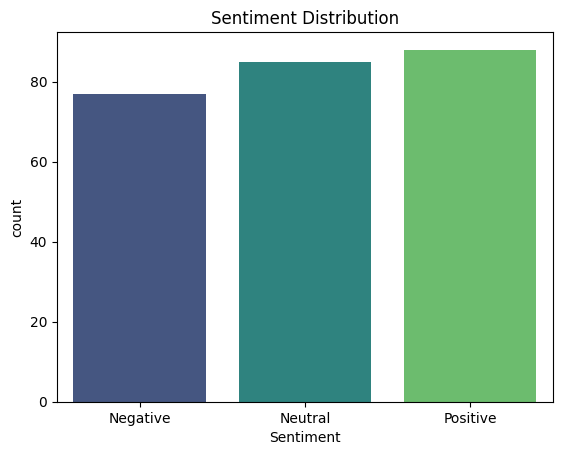

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/sample_data/amazon_sales_data 2025.csv")


# Map status to sentiment
sentiment_map = {
    'Completed': 'Positive',
    'Cancelled': 'Negative',
    'Pending': 'Neutral'
}
df['Sentiment'] = df['Status'].map(sentiment_map)

sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='viridis', legend=False)
plt.title("Sentiment Distribution")
plt.show()

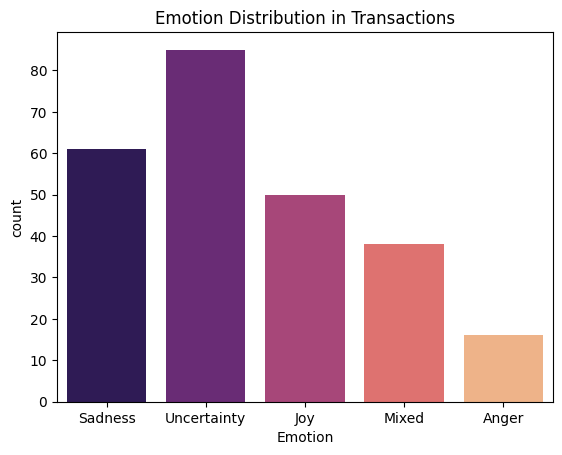

In [13]:
def map_emotion(row):
    if row['Sentiment'] == 'Positive' and row['Category'] in ['Electronics', 'Books']:
        return 'Joy'
    elif row['Sentiment'] == 'Negative' and row['Category'] in ['Home Appliances']:
        return 'Anger'
    elif row['Sentiment'] == 'Negative':
        return 'Sadness'
    elif row['Sentiment'] == 'Neutral':
        return 'Uncertainty'
    else:
        return 'Mixed'

df['Emotion'] = df.apply(map_emotion, axis=1)

sns.countplot(data=df, x='Emotion', hue='Emotion', palette='magma', legend=False)
plt.title("Emotion Distribution in Transactions")
plt.show()



<Axes: xlabel='Emotion', ylabel='count'>

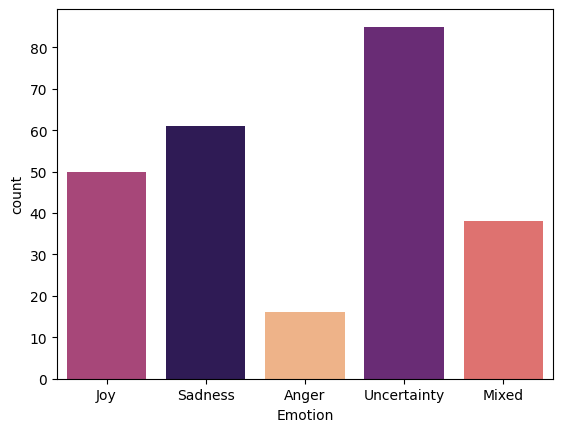

In [14]:
emotion_order = ['Joy', 'Sadness', 'Anger', 'Uncertainty', 'Mixed']
sns.countplot(data=df, x='Emotion', hue='Emotion', palette='magma', order=emotion_order, legend=False)

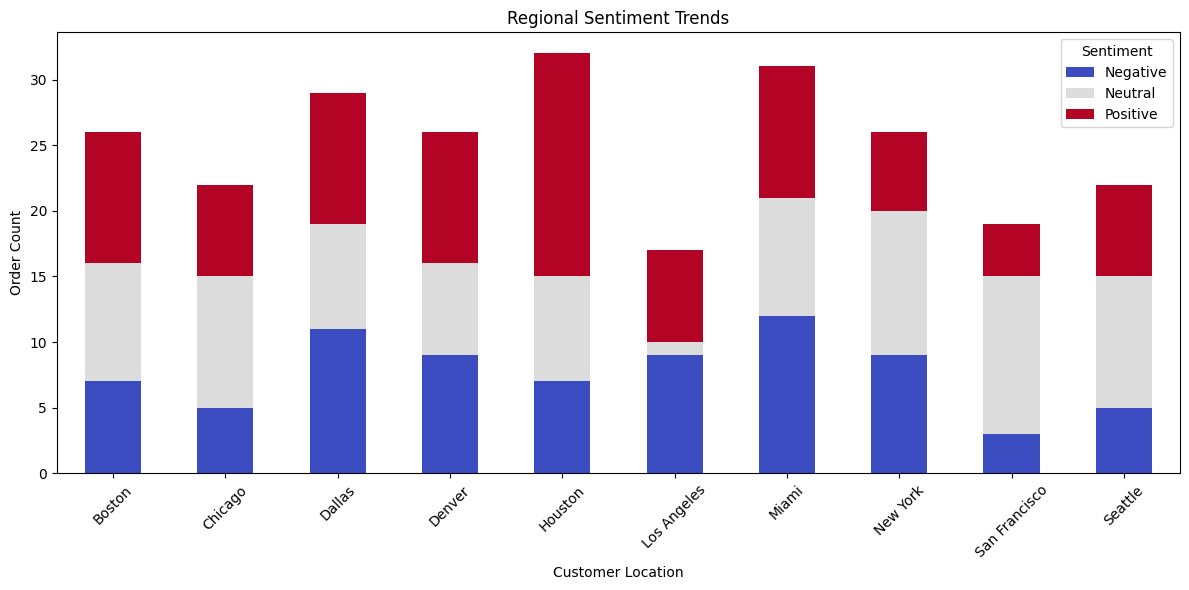

In [17]:
# Grouping by Location
location_trend = df.groupby(['Customer Location', 'Sentiment']).size().unstack().fillna(0)
# Plot trend
location_trend.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title("Regional Sentiment Trends")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




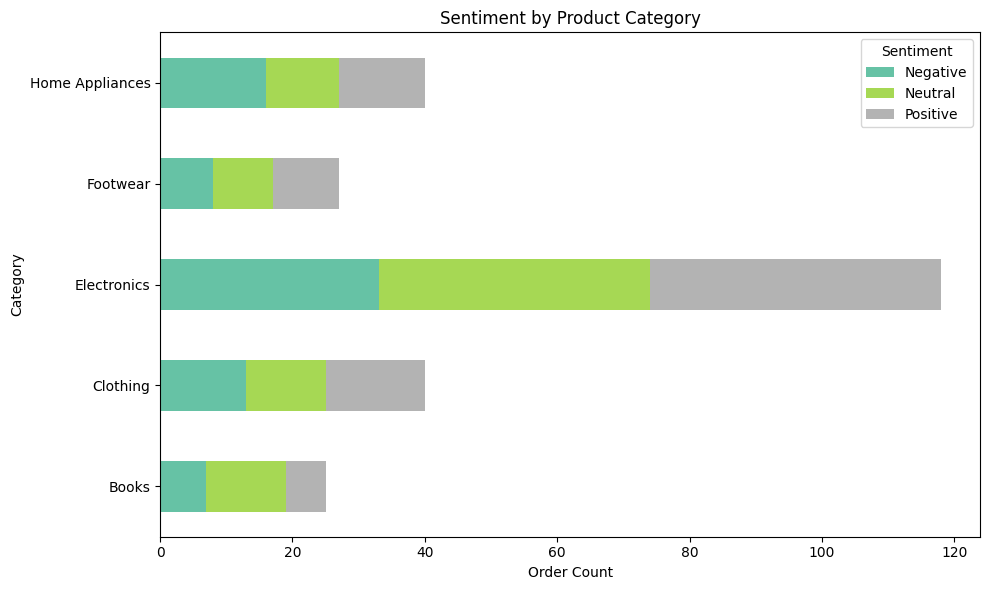

In [18]:
# Product category trend
category_trend = df.groupby(['Category', 'Sentiment']).size().unstack().fillna(0)
category_trend.plot(kind='barh', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Sentiment by Product Category")
plt.xlabel("Order Count")
plt.tight_layout()
plt.show()